In [1]:
from end2end import End2End
from datasets import UnsupervisedDataset
from matplotlib import pyplot as plt
import pickle

Load a subset of the ALM data (only has seesion 1 trials 1-20). We are loading only data
from channel 4, since it doesn't make sense to cluster data from multiple channels.


In [2]:
data = UnsupervisedDataset('./data/alm1_medium/', requested_channels=(4,))


Initialize the end-to-end algorithm, we think there may be between 2 and ten neurons, and
must choose the best option.

First, a convolutional autoencoder is run to partial convergence in order to provide
somewhat informative embeddings. Then we optimize for the multitarget reconstruction and
center loss (using GMM clustering at each epoch) for the requested number of epochs.

The out-of-order output is due to asynchronous multiprocessing

In [3]:
e2e = End2End(min_k=2, max_k=10, epochs=50, device='cpu')
e2e.fit(data)

Using CPU
Using CPU
Using CPU
Using CPU
Using CPU
Using CPU
***INITIALIZING AUTOENCODER***

EPOCH 1 of 20

EPOCH 2 of 20

EPOCH 3 of 20

EPOCH 4 of 20

EPOCH 5 of 20

EPOCH 6 of 20

EPOCH 7 of 20

EPOCH 8 of 20

EPOCH 9 of 20

EPOCH 10 of 20

EPOCH 11 of 20

EPOCH 12 of 20

EPOCH 13 of 20

EPOCH 14 of 20

EPOCH 15 of 20

EPOCH 16 of 20

EPOCH 17 of 20

EPOCH 18 of 20

EPOCH 19 of 20

EPOCH 20 of 20


In [4]:
with open('./local/e2e_unsup_med_ch4.pkl', 'wb') as f:
    pickle.dump(e2e, f)


In [3]:
with open('./local/e2e_unsup_med_ch4.pkl', 'rb') as f:
    e2e = pickle.load(f)

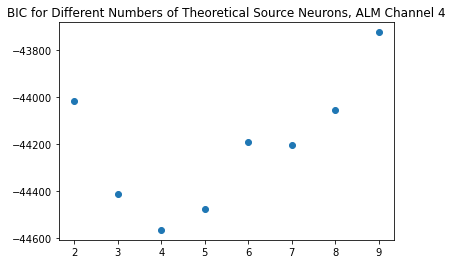

In [4]:
ks, bics = e2e.bics(data)
plt.scatter(ks, bics)
plt.title("BIC for Different Numbers of Theoretical Source Neurons, ALM Channel 4")
plt.show()

It looks like there are 4 source neurons. Lets see what that clustering looks like in 2D

In [9]:
BEST_K = 4
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
labels, _, embeddings = e2e.predict(data, BEST_K, return_latent=True)
manifold = tsne.fit_transform(embeddings)
x = manifold[:, 0]
y = manifold[:, 1]

Text(0.5, 1.0, '$t-SNE$ embeddings')

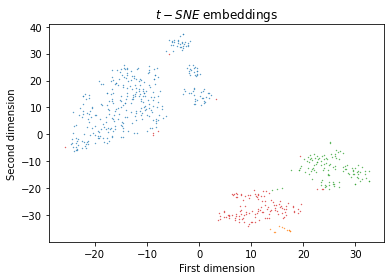

In [10]:
for c in range(BEST_K):
    plt.scatter(x[labels == c], y[labels == c], marker=".", s=.5)
plt.xlabel(r"First dimension")
plt.ylabel(r"Second dimension")
plt.title(r"$t-SNE$ embeddings")
